In [1]:
import sys
sys.path.append('C:\\Users\\elanphear\\Code\\ODYM\\odym\\modules') 

In [2]:
import dynamic_stock_model as dsm # import the dynamic stock model library

In [3]:
import openpyxl
import numpy as np
import matplotlib.pyplot as plt

# For Ipython Notebook only
get_ipython().run_line_magic('matplotlib', 'inline')

In [4]:
file_path = 'C:\\Users\\elanphear\\Code\\ODYM\\odym\\modules\\IEooc_Methods3_Software1_Data.xlsx'
DSM_Datafile  = openpyxl.load_workbook(filename=file_path)
DSM_Datasheet = DSM_Datafile['Data_Steel_China']

Historic_Years = [] #years 1900 to 2008
Historic_Inflow = [] # apparent final steel consumption, China, kt/yr
Future_Years = [] # years 2009-2100
Future_Stock = [] # future scenario for the steel stock, China, kt

for m in range(3,112): # Read historic data
    Historic_Years.append(int(DSM_Datasheet.cell(m,3).value))
    Historic_Inflow.append(DSM_Datasheet.cell(m,4).value)

for m in range(3,94): # Read future scenario
    Future_Years.append(int(DSM_Datasheet.cell(m,9).value))
    Future_Stock.append(DSM_Datasheet.cell(m,10).value)

print(Historic_Years)

print(Future_Stock)

[1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]
[3807600, 4275750, 4770570, 5287100, 5819790, 6362750, 6909990, 7455650, 7994100, 8520230, 9029470, 9517980, 9982660, 10421200, 10832000, 11214100, 11567200, 11891500, 12187600, 12456400, 12699100, 12917200, 13112000, 13285100, 13438000, 13572400, 13689600, 13791100, 13878200, 13952200, 14014200, 14065400, 14106600, 14138900, 14163000, 1417960

In [5]:
AvgLifetime = 30
InputStdDev = 0.3*AvgLifetime

China_DSM = dsm.DynamicStockModel(t = np.array(Historic_Years), i = np.array(Historic_Inflow), lt = {'Type': 'Normal', 'Mean': np.array([AvgLifetime]), 'StdDev': np.array([InputStdDev]) })


# Let's check the attributes of the object we just defined:<br>
# t indicates the time in years <br>

In [6]:
China_DSM.t

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008])

In [7]:
China_DSM.i

array([2.60000000e+01, 2.90000000e+01, 1.57635043e+01, 3.87423153e+01,
       3.85723027e+01, 3.13569960e+01, 5.03099246e+01, 6.08170510e+01,
       6.39341004e+01, 7.12607152e+01, 1.15607140e+02, 7.98376013e+01,
       1.76963850e+02, 2.65406003e+02, 2.96802738e+02, 3.34266175e+02,
       3.67457455e+02, 3.55308305e+02, 3.25261080e+02, 4.05685847e+02,
       4.26032783e+02, 3.88683728e+02, 3.95394039e+02, 3.37818541e+02,
       3.57777940e+02, 3.60627339e+02, 4.03735562e+02, 4.33759667e+02,
       4.73848478e+02, 4.32905718e+02, 4.95383156e+02, 4.68038437e+02,
       5.45120387e+02, 6.05852533e+02, 6.52001544e+02, 7.73483457e+02,
       7.88729281e+02, 9.31200000e+02, 1.01870000e+03, 1.10065000e+03,
       1.15630000e+03, 1.49618773e+03, 1.74098817e+03, 1.25485000e+03,
       1.25135000e+03, 1.81106208e+02, 1.33018720e+02, 5.58006610e+02,
       1.39678488e+02, 2.38562648e+02, 9.47795186e+02, 1.40500000e+03,
       1.86250000e+03, 2.14150000e+03, 2.98672136e+03, 3.71501969e+03,
      

In [8]:
China_DSM.lt

{'Type': 'Normal',
 'Mean': array([30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30]),
 'StdDev': array([9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
        9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
        9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
        9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
        9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
        9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
        9., 9

In [9]:
CheckStr = China_DSM.dimension_check()
print(CheckStr)

<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 109 years.<br>Inflow vector is present with 109 years.<br>Total stock is not present.<br>Stock by cohorts is not present.<br>Total outflow is not present.<br>Outflow by cohorts is not present.<br>Lifetime distribution is present with type Normal.<br>


In [10]:
Stock_by_cohort = China_DSM.compute_s_c_inflow_driven()
print(Stock_by_cohort)
print(Stock_by_cohort.shape)

[[2.59888444e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.59834639e+01 2.89875573e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.59757700e+01 2.89815559e+01 1.57567408e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.97143250e-16 1.13966330e-15 1.57451078e-15 ... 3.41730505e+05
  0.00000000e+00 0.00000000e+00]
 [1.52493143e-16 4.42967472e-16 6.19485768e-16 ... 3.41659756e+05
  4.01640996e+05 0.00000000e+00]
 [5.78441754e-17 1.70088506e-16 2.40783436e-16 ... 3.41558587e+05
  4.01557844e+05 3.93440924e+05]]
(109, 109)


In [11]:
S   = China_DSM.compute_stock_total()
print(S)

[2.59888444e+01 5.49710212e+01 7.07140667e+01 1.09417048e+02
 1.47932836e+02 1.79212539e+02 2.29405847e+02 2.90055778e+02
 3.53757581e+02 4.24697394e+02 5.39850791e+02 6.19092780e+02
 7.95223251e+02 1.05948783e+03 1.35477342e+03 1.68704008e+03
 2.05188839e+03 2.40384078e+03 2.72482680e+03 3.12506084e+03
 3.54422148e+03 3.92433107e+03 4.30908492e+03 4.63382001e+03
 4.97558922e+03 5.31677032e+03 5.69702711e+03 6.10263401e+03
 6.54294399e+03 6.93619110e+03 7.38494292e+03 7.79854417e+03
 8.28048386e+03 8.81348403e+03 9.38202173e+03 1.00604562e+04
 1.07416590e+04 1.15519128e+04 1.24354076e+04 1.33857984e+04
 1.43760665e+04 1.56896743e+04 1.72309368e+04 1.82686528e+04
 1.92848598e+04 1.92128484e+04 1.90741516e+04 1.93413335e+04
 1.91710377e+04 1.90799726e+04 1.96778280e+04 2.07121095e+04
 2.21824785e+04 2.39097734e+04 2.64591631e+04 2.97127568e+04
 3.38325430e+04 3.89916863e+04 5.16906457e+04 7.22606307e+04
 9.77967968e+04 1.09486254e+05 1.16499517e+05 1.22828792e+05
 1.30723087e+05 1.409748

In [12]:
O_C = China_DSM.compute_o_c_from_s_c()
print(O_C)

[[ 1.11555687e-02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.38048827e-03  1.24427497e-02 -0.00000000e+00 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 7.69396623e-03  6.00131384e-03  6.76349440e-03 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [ 6.24623843e-16  1.75695232e-15  2.37889430e-15 ...  1.46685941e+02
  -0.00000000e+00 -0.00000000e+00]
 [ 2.44650108e-16  6.96695824e-16  9.55025017e-16 ...  7.07487006e+01
   1.72402191e+02 -0.00000000e+00]
 [ 9.46489674e-17  2.72878966e-16  3.78702332e-16 ...  1.01168906e+02
   8.31520107e+01  1.68882355e+02]]


In [13]:
O   = China_DSM.compute_outflow_total()
print(O)

[1.11555687e-02 1.78232379e-02 2.04587745e-02 3.93339768e-02
 5.65146500e-02 7.72933862e-02 1.16616792e-01 1.67119460e-01
 2.32297932e-01 3.20901546e-01 4.53743493e-01 5.95612108e-01
 8.33378374e-01 1.14142445e+00 1.51714224e+00 1.99952128e+00
 2.60914025e+00 3.35592031e+00 4.27505977e+00 5.45180589e+00
 6.87214415e+00 8.57413714e+00 1.06401869e+01 1.30834511e+01
 1.60087353e+01 1.94462324e+01 2.34787761e+01 2.81527693e+01
 3.35384993e+01 3.96586083e+01 4.66313290e+01 5.44371917e+01
 6.31806929e+01 7.28523641e+01 8.34638404e+01 9.50489426e+01
 1.07526508e+02 1.20946225e+02 1.35205165e+02 1.50259197e+02
 1.66031974e+02 1.82579912e+02 1.99725699e+02 2.17133922e+02
 2.35142986e+02 2.53117681e+02 2.71715488e+02 2.90824706e+02
 3.09974280e+02 3.29627814e+02 3.49939742e+02 3.70718464e+02
 3.92130991e+02 4.14205101e+02 4.37331741e+02 4.61425985e+02
 4.86713746e+02 5.13356720e+02 5.44248919e+02 5.78264042e+02
 6.14874410e+02 6.47747532e+02 6.86216428e+02 7.29897087e+02
 7.79503908e+02 8.359792

In [14]:
DS  = China_DSM.compute_stock_change()
print(DS)

[ 2.59888444e+01  2.89821768e+01  1.57430455e+01  3.87029813e+01
  3.85157881e+01  3.12797026e+01  5.01933079e+01  6.06499315e+01
  6.37018025e+01  7.09398137e+01  1.15153396e+02  7.92419892e+01
  1.76130472e+02  2.64264578e+02  2.95285596e+02  3.32266653e+02
  3.64848315e+02  3.51952385e+02  3.20986020e+02  4.00234041e+02
  4.19160638e+02  3.80109591e+02  3.84753852e+02  3.24735090e+02
  3.41769205e+02  3.41181107e+02  3.80256786e+02  4.05606898e+02
  4.40309979e+02  3.93247110e+02  4.48751827e+02  4.13601246e+02
  4.81939694e+02  5.33000169e+02  5.68537704e+02  6.78434515e+02
  6.81202773e+02  8.10253775e+02  8.83494835e+02  9.50390803e+02
  9.90268026e+02  1.31360782e+03  1.54126247e+03  1.03771608e+03
  1.01620701e+03 -7.20114735e+01 -1.38696768e+02  2.67181904e+02
 -1.70295792e+02 -9.10651658e+01  5.97855443e+02  1.03428154e+03
  1.47036901e+03  1.72729490e+03  2.54938962e+03  3.25359371e+03
  4.11978625e+03  5.15914328e+03  1.26989594e+04  2.05699850e+04
  2.55361661e+04  1.16894

In [15]:
print(China_DSM.dimension_check()) # dimension_check returns two variables, but we only print the first one, which has index 0.

<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 109 years.<br>Inflow vector is present with 109 years.<br>Total stock is present with 109 years.<br>Stock by cohorts is present with 109 years and 109 cohorts.<br>Total outflow is present with 109 years.<br>Outflow by cohorts is present with 109 years and 109 cohorts.<br>Lifetime distribution is present with type Normal.<br>


In [16]:
Bal = China_DSM.check_stock_balance()
print(Bal)

[ 0.00000000e+00  3.55271368e-15 -1.06581410e-14  0.00000000e+00
  1.42108547e-14  7.10542736e-15 -7.10542736e-15 -1.42108547e-14
  5.68434189e-14 -4.26325641e-14  5.68434189e-14  0.00000000e+00
  0.00000000e+00 -1.13686838e-13  5.68434189e-14  0.00000000e+00
 -5.68434189e-14  2.27373675e-13 -2.27373675e-13  1.13686838e-13
  5.68434189e-14 -2.27373675e-13  5.68434189e-13 -4.54747351e-13
  4.54747351e-13  1.13686838e-13 -1.02318154e-12 -1.13686838e-13
  5.68434189e-13  3.41060513e-13 -1.13686838e-13 -4.54747351e-13
 -7.95807864e-13  1.13686838e-12 -1.13686838e-12  6.82121026e-13
  6.82121026e-13 -1.13686838e-12  1.81898940e-12 -1.13686838e-12
  7.95807864e-13 -2.27373675e-12 -4.54747351e-13  3.18323146e-12
 -1.81898940e-12  1.98951966e-12  2.35900188e-12 -5.00222086e-12
  1.47792889e-12 -1.30739863e-12  2.04636308e-12  0.00000000e+00
 -3.18323146e-12  3.41060513e-12 -5.45696821e-12  5.45696821e-12
 -3.63797881e-12  6.36646291e-12 -1.81898940e-12 -3.63797881e-12
  1.81898940e-11 -7.27595

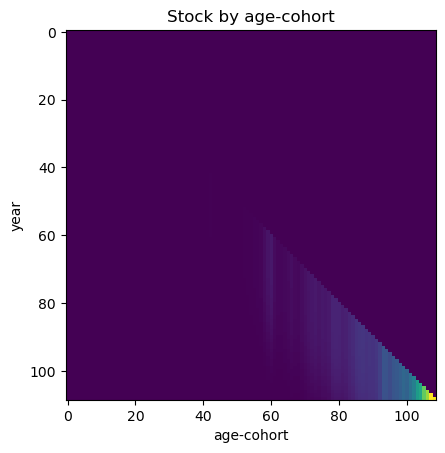

In [17]:
plt.imshow(China_DSM.s_c, interpolation='nearest')
plt.xlabel('age-cohort')
plt.ylabel('year')
plt.title('Stock by age-cohort')
plt.show();

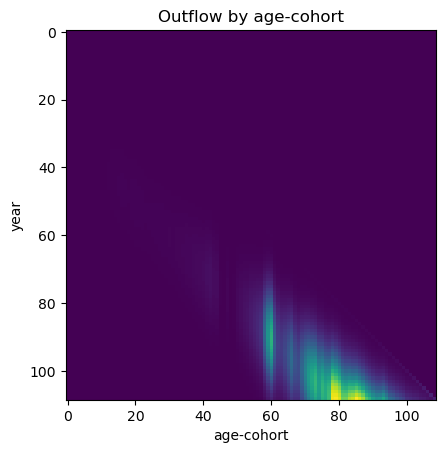

In [18]:
plt.imshow(China_DSM.o_c,interpolation='nearest')
plt.xlabel('age-cohort')
plt.ylabel('year')
plt.title('Outflow by age-cohort')
plt.show();

In [19]:
China_Stock_Full = np.concatenate((S,Future_Stock), axis =0)
Time_Full        = np.concatenate((np.array(Historic_Years),np.array(Future_Years)), axis =0)

China_DSM_Full = dsm.DynamicStockModel(t = Time_Full, s = China_Stock_Full, lt = {'Type': 'Normal', 'Mean': np.array([AvgLifetime]), 'StdDev': np.array([0.3*AvgLifetime]) })
CheckStr = China_DSM_Full.dimension_check()
print(CheckStr)

<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 200 years.<br>Inflow is not present.<br>Total stock is present with 200 years.<br>Stock by cohorts is not present.<br>Total outflow is not present.<br>Outflow by cohorts is not present.<br>Lifetime distribution is present with type Normal.<br>


In [20]:
S_C, O_C, I = China_DSM_Full.compute_stock_driven_model()
O   = China_DSM_Full.compute_outflow_total()
DS  = China_DSM_Full.compute_stock_change()
Bal = China_DSM_Full.check_stock_balance()
print(Bal)

[ 0.00000000e+00  0.00000000e+00  3.55271368e-15  0.00000000e+00
  0.00000000e+00 -2.84217094e-14  1.42108547e-14  3.55271368e-14
 -2.84217094e-14  2.84217094e-14 -4.26325641e-14  1.42108547e-14
 -2.84217094e-14  0.00000000e+00 -5.68434189e-14 -1.13686838e-13
  2.27373675e-13 -3.41060513e-13  3.41060513e-13 -1.13686838e-13
  5.68434189e-14  3.41060513e-13 -1.70530257e-13 -2.84217094e-13
  2.84217094e-13  0.00000000e+00 -8.52651283e-13  2.84217094e-13
  5.68434189e-14  2.84217094e-13 -5.11590770e-13  1.70530257e-13
 -3.41060513e-13  5.68434189e-13  1.81898940e-12 -2.16004992e-12
  3.41060513e-13  1.25055521e-12 -1.25055521e-12 -1.36424205e-12
  4.54747351e-13  2.27373675e-13 -6.82121026e-13 -1.81898940e-12
  3.63797881e-12 -9.66338121e-13  1.73372428e-12  1.13686838e-12
 -1.98951966e-12 -1.25055521e-12  1.13686838e-12  1.13686838e-12
 -1.13686838e-12 -3.86535248e-12  1.36424205e-12  4.54747351e-13
  3.63797881e-12 -9.09494702e-13 -1.81898940e-12  3.63797881e-12
  7.27595761e-12 -9.09494

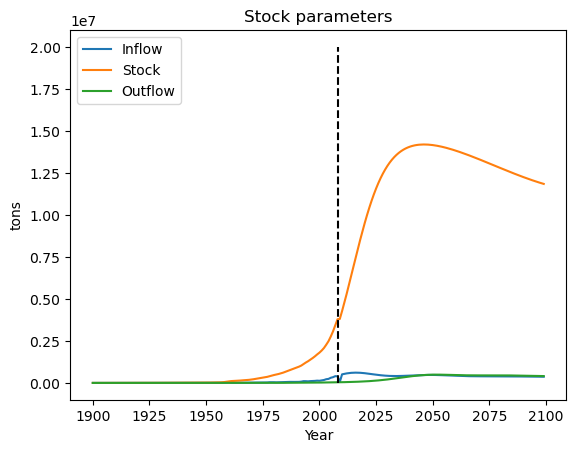

In [21]:
plt1, = plt.plot(China_DSM_Full.t, China_DSM_Full.i)
plt2, = plt.plot(China_DSM_Full.t, China_DSM_Full.s)
plt3, = plt.plot(China_DSM_Full.t, China_DSM_Full.o)
plt4, = plt.plot([2008,2008],[0,2e7], color = 'k', linestyle = '--')
plt.xlabel('Year')
plt.ylabel('tons')
plt.title('Stock parameters')
plt.legend([plt1,plt2,plt3], ['Inflow','Stock','Outflow'], loc = 2)
plt.show();

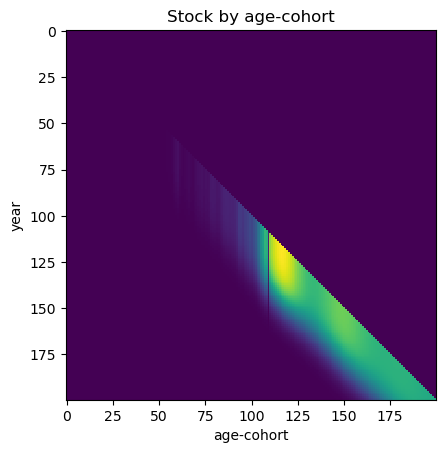

In [22]:
plt.imshow(China_DSM_Full.s_c,interpolation='nearest')
plt.xlabel('age-cohort')
plt.ylabel('year')
plt.title('Stock by age-cohort')
plt.show();

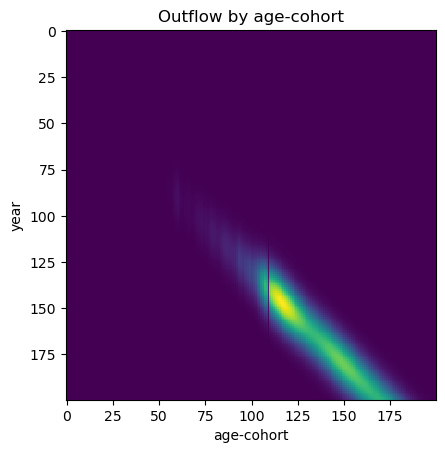

In [23]:
plt.imshow(China_DSM_Full.o_c,interpolation='nearest')
plt.xlabel('age-cohort')
plt.ylabel('year')
plt.title('Outflow by age-cohort')
plt.show();

In [24]:
FlowBal = China_DSM_Full.i[0:109] - Historic_Inflow
print(FlowBal)
print(np.abs(FlowBal).sum())

[ 0.00000000e+00 -3.55271368e-15  1.42108547e-14  0.00000000e+00
 -7.10542736e-15 -3.55271368e-14  1.42108547e-14  4.97379915e-14
 -8.52651283e-14  7.10542736e-14 -9.94759830e-14  2.84217094e-14
  0.00000000e+00  1.13686838e-13 -1.13686838e-13 -1.13686838e-13
  3.41060513e-13 -5.11590770e-13  5.68434189e-13 -1.70530257e-13
 -5.68434189e-14  6.25277607e-13 -7.38964445e-13  1.70530257e-13
 -1.70530257e-13 -1.70530257e-13  2.27373675e-13  4.54747351e-13
 -5.68434189e-13 -1.13686838e-13 -3.97903932e-13  5.68434189e-13
  5.68434189e-13 -6.82121026e-13  2.84217094e-12 -2.61479727e-12
 -3.41060513e-13  2.50111043e-12 -3.29691829e-12  0.00000000e+00
 -4.54747351e-13  2.50111043e-12 -4.54747351e-13 -4.77484718e-12
  5.45696821e-12 -2.81374923e-12 -2.84217094e-13  5.57065505e-12
 -3.69482223e-12  5.11590770e-13 -6.82121026e-13  9.09494702e-13
  2.27373675e-12 -7.27595761e-12  6.82121026e-12 -4.54747351e-12
  6.36646291e-12 -7.27595761e-12 -1.81898940e-12  7.27595761e-12
 -1.09139364e-11 -1.81898